# Importing Neccesary Libraries and Data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
VaccineTypes2020 = pd.read_csv("2020VAERSVAX.csv")
VaccineData2020 = pd.read_csv("2020VAERSData.csv")
VaccineSymptoms2020 = pd.read_csv("2020VAERSSYMPTOMS.csv")
VaccineTypes2021 = pd.read_csv("2021VAERSVAX.csv")
VaccineData2021 = pd.read_csv("2021VAERSData.csv")
VaccineSymptoms2021 = pd.read_csv("2021VAERSSYMPTOMS.csv")
TotalVaccinationsOverTime=pd.read_csv("Vaccinations - OWID covid-19-data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Merging Data Into Composite DataFrame

In [16]:
Vac2020A=pd.merge(VaccineTypes2020,VaccineData2020,how='inner',on='VAERS_ID')

In [17]:
Vac2020Complete=pd.merge(Vac2020A,VaccineSymptoms2020,how='inner',on='VAERS_ID')

In [18]:
Vac2021A=pd.merge(VaccineTypes2021,VaccineData2021,how='inner',on='VAERS_ID')
Vac2021Complete=pd.merge(Vac2021A,VaccineSymptoms2021,how='inner',on='VAERS_ID')

In [19]:
COVID2021=Vac2021Complete[Vac2021Complete['VAX_TYPE']=='COVID19']
COVID2020=Vac2020Complete[Vac2020Complete['VAX_TYPE']=='COVID19']
COVIDOverall=pd.concat([COVID2020,COVID2021],axis=0)

# Generating COVID-19 Deaths By Age Graph

In [20]:
COVIDOverall['DIED'].value_counts()

Y    3813
Name: DIED, dtype: int64

In [21]:
COVIDDeaths=COVIDOverall[COVIDOverall['DIED']=='Y']

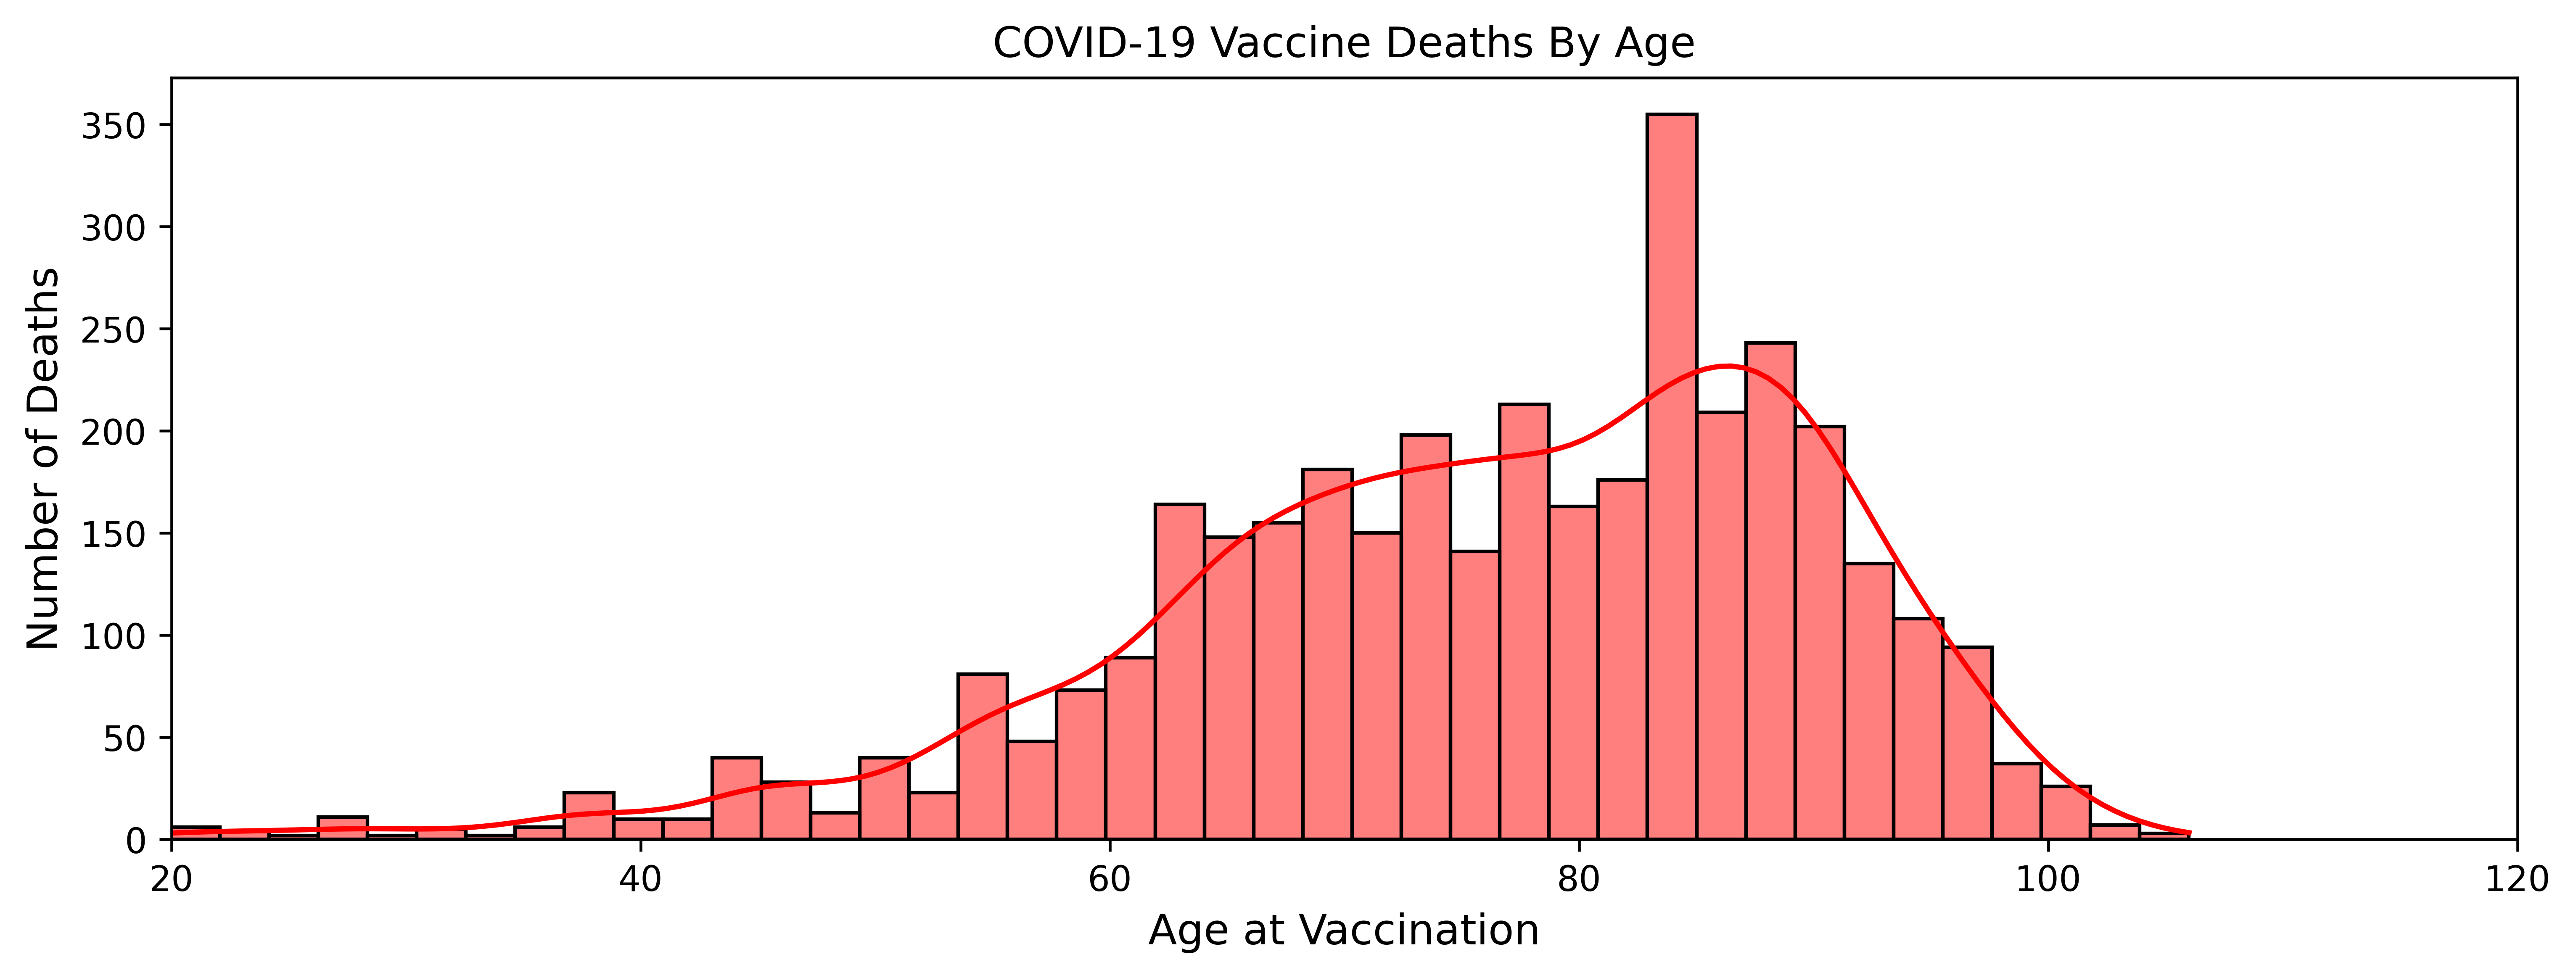

In [22]:
fig, ax = plt.subplots(figsize = ( 12 , 4 ),dpi=600)
g = sns.histplot(data=COVIDDeaths,x='AGE_YRS',bins=50,kde=True,color='red')
plt.title('COVID-19 Vaccine Deaths By Age')
# Set label for x-axis
ax.set_xlabel( "Age at Vaccination" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Number of Deaths" , size = 12 )
plt.xlim(20,120)

fig.savefig('vaccinedeaths.jpg', bbox_inches='tight', dpi=1000)

# Estimating Adverse COVID-19 Reaction Ratio

In [23]:
len(COVIDOverall[COVIDOverall['DIED']=='Y'])

3813

In [24]:
TotalVaccinationsOverTime['people_vaccinated'].max()

131247546.0

In [25]:
1000*(len(COVIDOverall)/TotalVaccinationsOverTime['people_vaccinated'].max())

0.7159448146939068

# Estimating Lethality Ratio Between COVID-19 And Its Vaccine

In [26]:
VaccineDeathRate=len(COVIDOverall[COVIDOverall['DIED']=='Y'])/TotalVaccinationsOverTime['people_vaccinated'].max()

In [27]:
#COVID-19 CFR / VaccineDeathRate
.021/VaccineDeathRate

722.8425035405194

In [28]:
VaccineDeathRate

2.9051971760294855e-05

<AxesSubplot:xlabel='Odds of Death', ylabel='Cause of Death'>

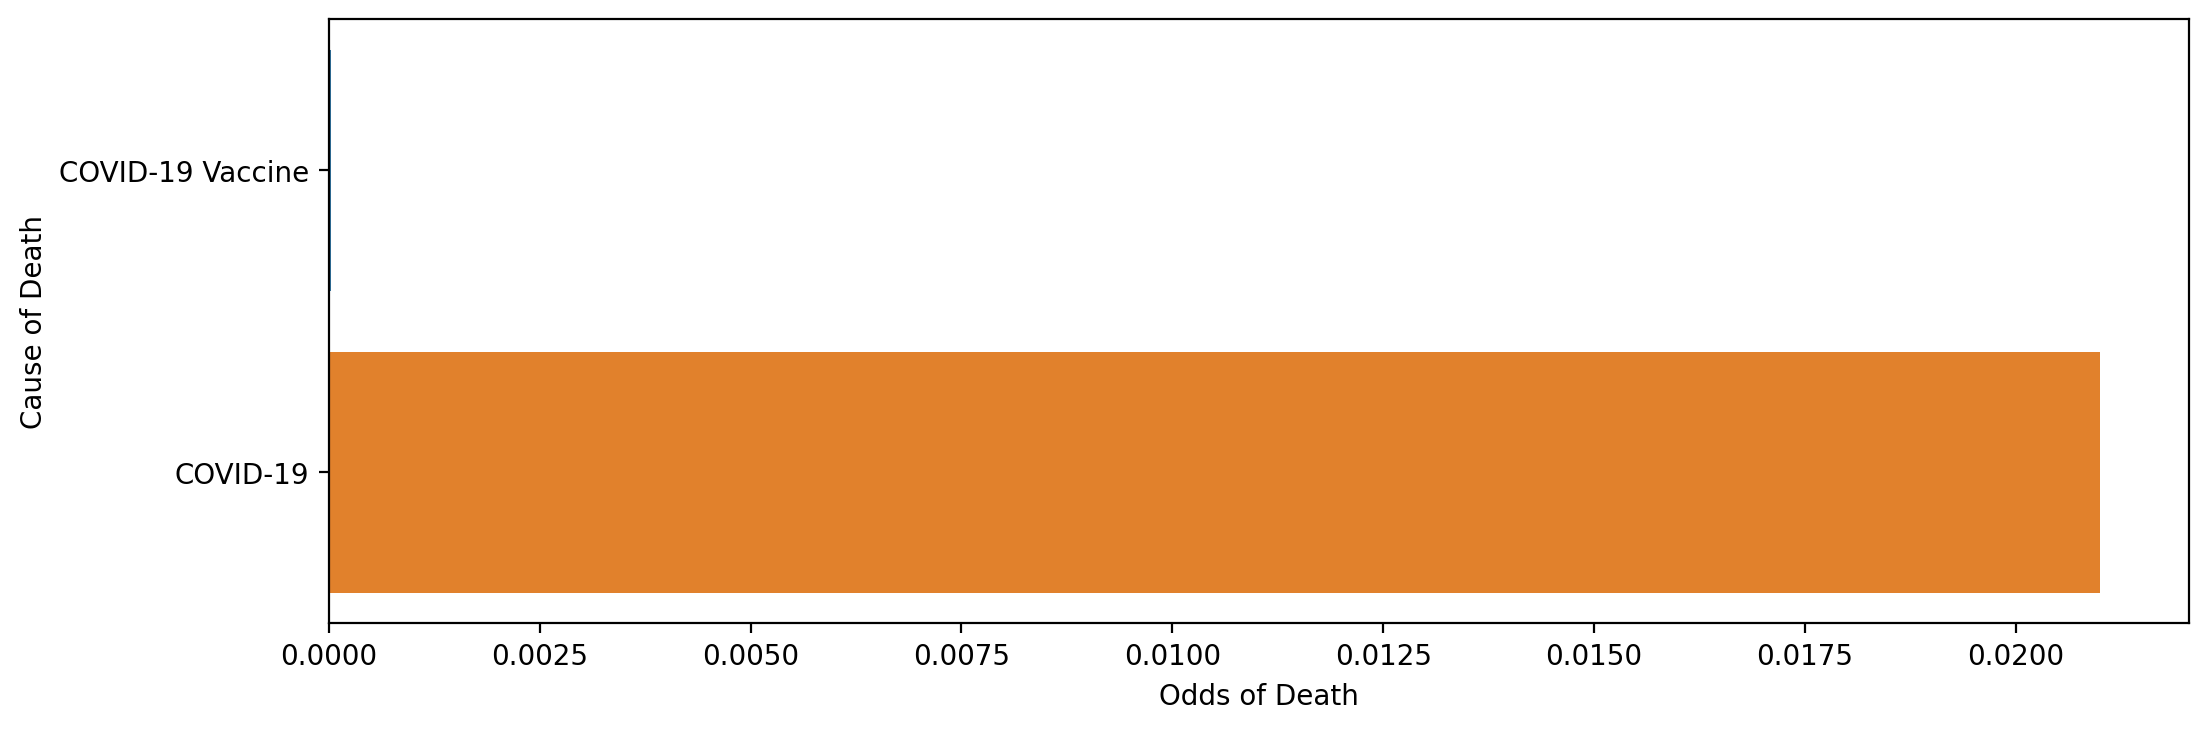

In [29]:
DeathOdds=pd.DataFrame({'Cause of Death': ['COVID-19 Vaccine', 'COVID-19'],'Odds of Death': [VaccineDeathRate, .021]})
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(data=DeathOdds,y='Cause of Death',x='Odds of Death')

In [30]:
DeathOdds

,Cause of Death,Odds of Death
0,COVID-19 Vaccine,0.000029
1,COVID-19,0.021000
